# Code to show a basic convolution example

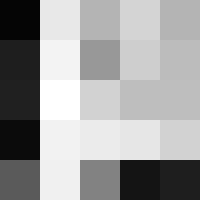

In [1]:
import numpy as np, PIL.Image, scipy.signal

arr = np.array([[5,  232, 180, 212, 180],
                [30, 243, 152, 206, 188],
                [32, 255, 210, 190, 190],
                [11, 242, 235, 230, 210],
                [90, 240, 130,  20,  30]], dtype=np.uint8)

PIL.Image.fromarray(arr).resize((200, 200))

[[  0 255   0 200   0]
 [  0 255   0 116   0]
 [  0 255   0  67   0]
 [  0 255   0   0   0]
 [  0 255   0   0   0]]


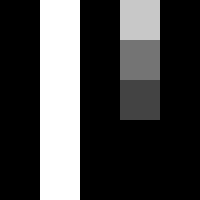

In [2]:
kernel = np.array([[-1, 2, -1],
                   [-1, 2, -1],
                   [-1, 2, -1]])

output = scipy.signal.convolve2d(arr, kernel, mode="same", boundary="symm")

# clip to lie within [0, 255]
output = np.minimum(np.maximum(output, 0), 255)

print(output)

PIL.Image.fromarray(output.astype(np.uint8)).resize((200,200))

# Code to show nonlinear sensor errors in an Extended Kalman Filter

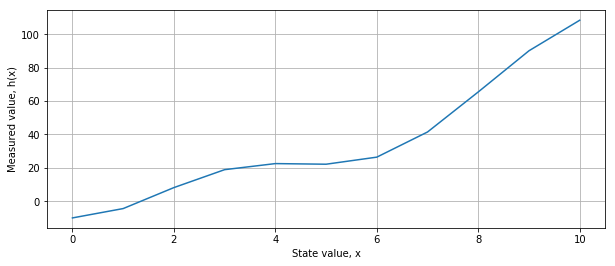

Error of 1 unit around x = 8: 25.486472205198496
Error of 1 unit around x = 4: 0.7433911213998314


In [9]:
import numpy as np, matplotlib.pyplot as plt

def sensor_function(x):
    return np.power(x, 2.) - 10*np.cos(x)

x = np.linspace(0, 10, num=11)
measured_x = sensor_function(x)

plt.plot(measured_x); plt.grid()
plt.xlabel('State value, x'); plt.ylabel('Measured value, h(x)')
fig = plt.gcf(); fig.set_size_inches(10, 4, forward=True); plt.show()

print('Error of 1 unit around x = 8:', sensor_function(8.5) - sensor_function(7.5))
print('Error of 1 unit around x = 4:', sensor_function(4.5) - sensor_function(3.5))

# Code to plot the systems actual sensor function: `pixel` -> `angle`

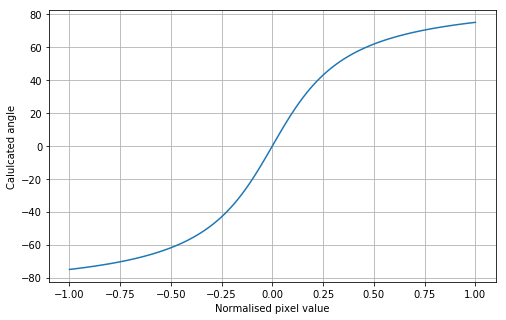

In [2]:
import numpy as np, matplotlib.pyplot as plt

def sensor_function(x, cam_FOV_deg):
    cam_FOV_rad = np.deg2rad(cam_FOV_deg)
    return np.arctan(x * np.tan(cam_FOV_rad))

pixels_norm = np.linspace(-1, 1, num=100)
pixels_deg = np.rad2deg(sensor_function(pixels_norm, 75))

plt.plot(pixels_norm,pixels_deg); plt.grid()
plt.xlabel('Normalised pixel value'); plt.ylabel('Calulcated angle')
fig = plt.gcf(); fig.set_size_inches(8, 5, forward=True); plt.show()